<a href="https://colab.research.google.com/github/Gupta-Vaishali/Song-Genre-Classification/blob/main/Neural_Ntk_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2 Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...


In [ ]:
genre_code={"Pop":0,"Hip-Hop":1,"Rock":2,"Indie":3,"Metal":4,"Other":5,"Country":6,"Folk":7,"Jazz":8,"R&B":9,"Electronic":10}
for i in df.index:
  df.loc[i,'genre_code'] = genre_code[df.loc[i,'genre']]

# 4 - extracting the required columns
df['expanded_lyrics'].fillna(value=' ',inplace =True)
X = pd.DataFrame(df['expanded_lyrics'])
Y = pd.DataFrame(df['genre_code'])

# splitting the data in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [ ]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim.models.doc2vec
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing

In [ ]:
tqdm.pandas(desc="progress-bar")
# Initializing the variables
train_documents = []
test_documents = []
i = 0
# Associating the tags(labels) with numbers
tags_index = {}
j = 0
for i in df['genre_code'].unique() :
  tags_index[i] = j
  j+=1
#Reading the X_Train
for i in X_train.index :
            train_documents.append( TaggedDocument(words=str(X_train.loc[i,'expanded_lyrics']).split(), tags=[tags_index.get(Y_train.loc[i,'genre_code'])] ))

for i in X_test.index :
            test_documents.append( TaggedDocument(words=str(X_test.loc[i,'expanded_lyrics']).split(), tags=[tags_index.get(Y_test.loc[i,'genre_code'])] ))
 #tags=[tags_index.get(row[3], 8)]))
print(train_documents[0])
print(test_documents[0])

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


TaggedDocument(['cold', 'blue', 'wave', 'cold', 'dead', 'sky', 'see', 'sea', 'need', 'cold', 'blue', 'wave', 'cold', 'blue', 'mind', 'hear', 'talk', 'cold', 'dead', 'mind', 'see', 'sea', 'every', 'dream', 'want', 'stay', 'every', 'night', 'try', 'find', 'way'], [2])
TaggedDocument(['many', 'time', 'have', 'dream', 'see', 'many', 'day', 'without', 'sun', 'because', 'know', 'shine', 'day', 'many', 'way', 'miss', 'sun', 'wait', 'california', 'get', 'ta', 'see', 'way', 'many', 'time', 'have', 'heart', 'ache', 'none', 'time', 'feel', 'far', 'go', 'be', 'worthwhile', 'get', 'back', 'belong', 'local', 'mountain', 'love', 'style', 'every', 'day', 'like', 'song', 'wait', 'california', 'get', 'ta', 'see', 'way', 'need', 'kind', 'life', 'give', 'make', 'love', 'feel', 'true', 'wait', 'california', 'get', 'ta', 'see', 'way', 'need', 'kind', 'life', 'give', 'make', 'love', 'feel', 'true'], [2])


In [ ]:
model_dbow = Doc2Vec.load('/content/drive/MyDrive/SONGGenreModel (1).d2v')

In [ ]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents]) #, steps=20
    return targets, feature_vectors

In [ ]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

In [ ]:
#for 
tags_index2 = {}
for i in tags_index :
  tags_index2[tags_index[i]] = i
training_padded = np.array(X_train)
training_labels = np.array(y_train)
testing_padded = np.array(X_test)
testing_labels = np.array(y_test)
from keras.utils import np_utils
testing_labels_en = np_utils.to_categorical(testing_labels)
training_labels_en = np_utils.to_categorical(training_labels)

In [ ]:
# epochs = 100 (great fit) now 200 (not so great)
from keras import models
from keras import layers
model2 = models.Sequential()
model2.add(layers.Dense(96,input_dim= 300, activation='sigmoid')) #300,300 -> 100,300
model2.add(layers.Dense(128,activation='sigmoid'))
model2.add(layers.Dense(11, activation='softmax'))
from keras.optimizers import SGD
opt = SGD(learning_rate=0.002) #dont -> 0.001, 0.01

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

In [ ]:
# start training
H2 = model2.fit(training_padded,training_labels_en, epochs=100,validation_split=0.3 ,batch_size=10, verbose=1)

Epoch 1/100
12984/12984 [==============================] - 38s 2ms/step - loss: 1.7596 - categorical_accuracy: 0.4511 - val_loss: 1.7136 - val_categorical_accuracy: 0.4574
Epoch 2/100
12984/12984 [==============================] - 23s 2ms/step - loss: 1.6936 - categorical_accuracy: 0.4588 - val_loss: 1.6214 - val_categorical_accuracy: 0.5001
Epoch 3/100
12984/12984 [==============================] - 23s 2ms/step - loss: 1.5865 - categorical_accuracy: 0.5110 - val_loss: 1.5050 - val_categorical_accuracy: 0.5270
Epoch 4/100
12984/12984 [==============================] - 23s 2ms/step - loss: 1.4779 - categorical_accuracy: 0.5336 - val_loss: 1.4285 - val_categorical_accuracy: 0.5480
Epoch 5/100
12984/12984 [==============================] - 29s 2ms/step - loss: 1.4102 - categorical_accuracy: 0.5600 - val_loss: 1.3785 - val_categorical_accuracy: 0.5743
Epoch 6/100
12984/12984 [==============================] - 23s 2ms/step - loss: 1.3671 - categorical_accuracy: 0.5765 - val_loss: 1.3481 - v

In [ ]:
#22
_, accuracy = model2.evaluate(testing_padded, testing_labels_en, verbose=1)
print(accuracy)

1023/1023 [==============================] - 1s 1ms/step - loss: 1.2800 - categorical_accuracy: 0.6006
0.6005743741989136


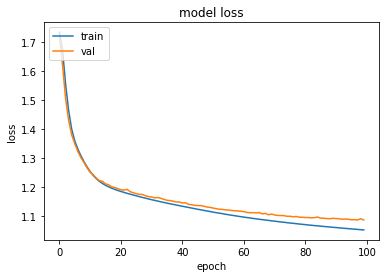

In [ ]:
# summarize history for loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

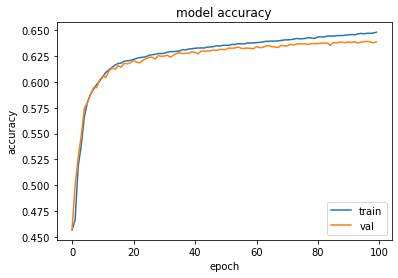

In [ ]:
# summarize history for accuracy
plt.plot(H2.history['categorical_accuracy'])
plt.plot(H2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
y_pred = model2.predict(testing_padded)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
# Print f1, precision, and recall scores
print("Accuracy:",accuracy_score(testing_labels, y_pred))
print("Precision:",precision_score(testing_labels, y_pred , average="macro"))
print("Recall:",recall_score(testing_labels, y_pred , average="macro"))
print("F1-score:",f1_score(testing_labels, y_pred , average="macro"))

Accuracy: 0.6005743614811194
Precision: 0.42290626191975456
Recall: 0.3035838750179441
F1-score: 0.3194942731782204


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.35      0.41      5162
           1       0.79      0.79      0.79      3371
           2       0.62      0.80      0.70     15126
           3       0.60      0.62      0.61      3186
           4       0.13      0.02      0.03       547
           5       0.45      0.35      0.39      2062
           6       0.39      0.24      0.29      1070
           7       0.20      0.06      0.09       943
           8       0.35      0.06      0.10       278
           9       0.55      0.04      0.07       526
          10       0.08      0.01      0.01       461

    accuracy                           0.60     32732
   macro avg       0.42      0.30      0.32     32732
weighted avg       0.56      0.60      0.57     32732



In [ ]:
genre_code

{'Country': 6,
 'Electronic': 10,
 'Folk': 7,
 'Hip-Hop': 1,
 'Indie': 3,
 'Jazz': 8,
 'Metal': 4,
 'Other': 5,
 'Pop': 0,
 'R&B': 9,
 'Rock': 2}